# Feature Importance

References:
- [A CEEMDAN and XGBOOST-Based Approach to Forecast Crude Oil Prices](https://www.hindawi.com/journals/complexity/2019/4392785/)
- [How to Remove Trends and Seasonality with a Difference Transform in Python](https://machinelearningmastery.com/remove-trends-seasonality-difference-transform-python/)
- [A CEEMDAN and XGBOOST-Based Approach to Forecast Crude Oil Prices](http://downloads.hindawi.com/journals/complexity/2019/4392785.pdf)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
data = pd.read_csv('spooky4.csv')
data=data.rename(columns = {'Unnamed: 0':'date'})
data = data.set_index('date')

## Step 1: Basice Exploration

Observations:
- Commodities start from different dates. For the long scale modeling, only consider corn.

## Step 2: Data Preprocessing



At first stage
- analyze march 2019 soybean dataset.
- remove all close* columns except march2019_corn.
- remove the price columns that are missing.
- Note that we cannot do difference for tweet and tariff data.

Operations:
- As investigated by Somyi, by doing 1-order difference, we can have stationary time series. So do 1-order differencing.
- Covariates scaling.

In [3]:
df = data[pd.notnull(data['close_march2020_soybean'])].dropna(axis='columns', how='all')
df = df.rename(columns = {'close_march2020_soybean':'soybean', 'close_march2020_corn': 'corn'})

Check the missing columns.

In [4]:
# fillna for tariff, trade_tweets, and economy_tweets
for col in ['tariff', 'trade_tweets', 'economy_tweets']:
    df[col] = df[col].fillna(0)

# remove missing columns
rm_list = df.columns[df.isnull().any()]
df = df.drop(columns = rm_list)

Generate stationarized and scaled dataframe.

In [5]:
# generate the stationarized dataset
df_st = pd.DataFrame([], index=df.index[1:], columns=df.columns)

for i in range(len(df.columns)):
    df_st.iloc[:,i] = df.iloc[:,i].diff()[1:] # 1-order difference

# # keep the original tariff and tweet columns
for col in ['tariff', 'trade_tweets', 'economy_tweets']:
    df_st[col] = df[col]

In [6]:
df_st

TEMP_argentina  DEWP_argentina  VISIB_argentina  WDSP_argentina  \
date                                                                          
2018-03-16            -2.0            -4.4              0.0            -0.9   
2018-03-19            -2.3            -2.0              0.0            -3.6   
2018-03-20             1.7             2.9              0.0             4.1   
2018-03-21            -3.5             2.7              0.0            -0.2   
2018-03-22             7.6             8.3              0.0             0.3   
2018-03-23             7.9             7.4              0.0            -1.9   
2018-03-26           -18.6           -23.9              0.0             0.9   
2018-03-27             5.9             6.1              0.0            -0.8   
2018-03-28             2.2             4.1              0.0            -0.5   
2018-03-29             5.7             5.7              0.0            -0.5   
2018-04-02            -4.7             8.4             -3.2             1.2   
2018-04-03             5.3            -0.6              3.2            -3.4   
2018-04-04            -0.2            -3.6             -2.3             0.8   
2018-04-05             1.1             0.6              2.3             0.4   
2018-04-06            -8.3            -0.1             -5.5             4.7   
2018-04-09            12.6             8.5              2.4            -0.7   
2018-04-10             4.1            -1.5              3.1             3.5   
2018-04-11            -1.4             1.6              0.0            -1.1   
2018-04-12           -11.0           -19.9              0.0             3.8   
2018-04-13           -14.5            -7.6              0.0            -8.7   
2018-04-16            18.1            22.8              0.0             3.5   
2018-04-17             2.0             0.1              0.0            -1.2   
2018-04-18             4.4             3.1              0.0            -1.0   
2018-04-19            -1.9             0.1              0.0             0.0   
2018-04-20            -4.5             1.2             -3.8            -0.5   
2018-04-23            -2.9            -3.7              3.8             0.8   
2018-04-24             1.8             2.1             -1.9             1.5   
2018-04-25             3.8             1.9              1.2            -3.1   
2018-04-26             1.3             1.6              0.7             3.8   
2018-04-27             0.8            -1.7             -1.2            -3.5   
...                    ...             ...              ...             ...   
2019-09-09             6.4            14.6             -2.4             1.0   
2019-09-10            -2.3            -2.1              0.4            -2.0   
2019-09-11            -0.2            -0.2             -0.4             0.0   
2019-09-12            -1.9            -9.4              0.4            -1.5   
2019-09-13             0.5            -1.1              1.4             1.1   
2019-09-16             6.9             0.9              0.6             8.6   
2019-09-17            -3.9            -7.6              0.0            -9.8   
2019-09-18             6.1             5.1              0.0             0.9   
2019-09-19            -5.1            -3.3             -0.4             7.8   
2019-09-20            -6.2            -8.8              0.4            -9.7   
2019-09-23            11.0            16.3              0.0             6.4   
2019-09-24             0.2             0.7              0.0            -7.0   
2019-09-25             4.2            -0.3              0.0             0.5   
2019-09-26             1.0            -0.5              0.0             2.3   
2019-09-27             0.5             7.5              0.0             8.8   
2019-09-30            10.2             8.1              0.0            -1.6   
2019-10-01           -15.8           -16.9              0.0             4.9   
2019-10-02             0.0             0.0              0.0   

In [7]:
# invert differenced forecast
def inverse_diff(last_ob, value):
    return value + last_ob

In [6]:
y = df_st['soybean'].values

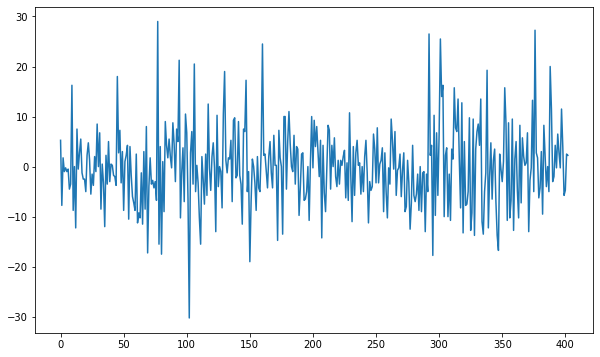

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(y)

## Step 3: Models

### 3.1 Linear Model using lag as covariates

In [8]:
# Evaluating metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [9]:
# cross-validation for confidence interval
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit

# for time-series cross-validation set 5 folds 
tscv = TimeSeriesSplit(n_splits=5)

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=24):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=3) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [10]:
# functions to plot model results
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

def plotModelResults(model, X_train, X_test, y_train, y_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(12, 6))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

In [12]:
# get the dataset for fitting the model
df_tr = pd.DataFrame(df_st.soybean.copy())
df_tr.columns = ["y"]

# Adding the lag of the target variable from 6 steps back up to 24
for i in range(6, 25):
    df_tr["lag_{}".format(i)] = df_tr.y.shift(i)

### 3.2 Linear Model with external covariates

Model details:
- No lag covariates.
- first include all covariates.

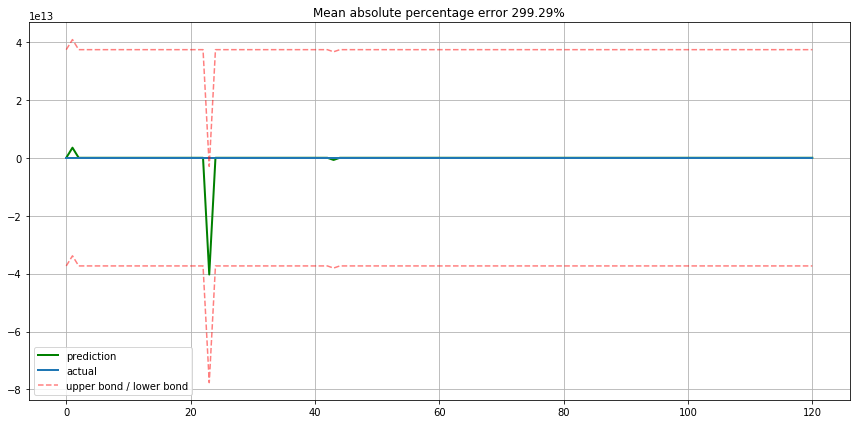

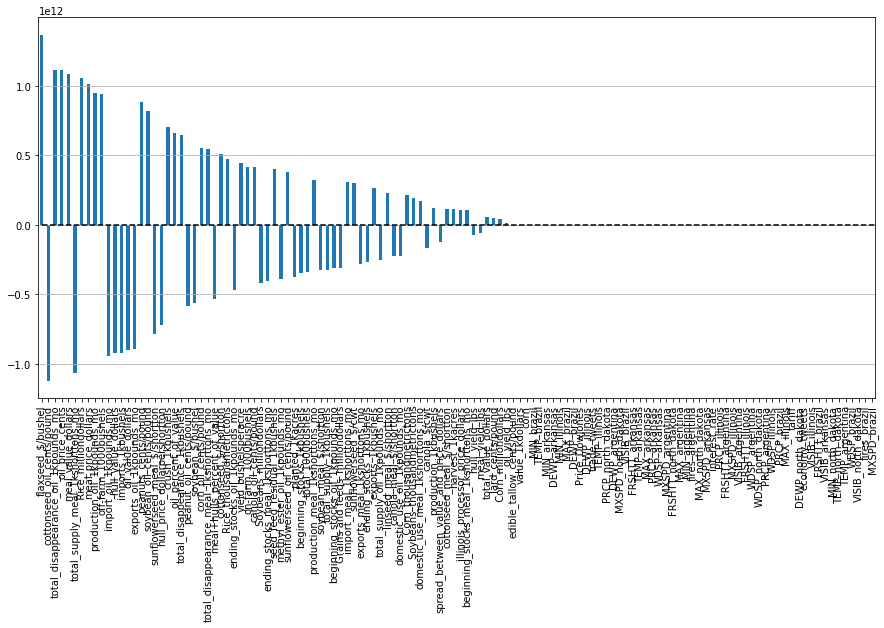

In [68]:
# linear regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_lr = df_st.copy()

y = df_lr['soybean']
X = df_lr.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

plotModelResults(lr, X_train_scaled, X_test_scaled, y_train, y_test, plot_intervals=True)
plotCoefficients(lr)

In [69]:
# feature importance of linear regression
feature_lr = pd.DataFrame(lr.coef_, X_train.columns)
feature_lr = feature_lr.reset_index()
feature_lr.columns = ['variable', 'importance']
feature_lr = feature_lr.sort_values(by='importance', ascending=False)
feature_lr = feature_lr.reset_index(drop=True)
feature_lr

variable    importance
0                          flaxseed_$/bushel  1.368594e+12
1        total_disappearance_oil_1kpounds_mo  1.112366e+12
2                            oil_price_cents  1.110920e+12
3                         meal_value_dollars  1.088053e+12
4                        Rice_milliondollars  1.054904e+12
5                         meal_price_dollars  1.014611e+12
6                 production_oil_1kpounds_mo  9.463632e+11
7                       off-farm_1000bushels  9.437516e+11
8                        peanuts_cents/pound  8.835354e+11
9                    soybean_oil_cents/pound  8.180982e+11
10                           crush_1kbushels  7.016576e+11
11                      oil_percent_of_value  6.626821e+11
12             total_disappearance_1kbushels  6.433073e+11
13                      corn_oil_cents/pound  5.555091e+11
14   total_disappearance_meal_1kshorttons_mo  5.466654e+11
15                     cottonseed_$/shortton  5.106037e+11
16                   Rice_thousandmetrictons  4.713920e+11
17                      yield_bushelsperacre  4.441839e+11
18                       on-farm_1000bushels  4.191484e+11
19                    canola_oil_cents/pound  4.180490e+11
20              seed_feed_residual_1kbushels  3.986570e+11
21             sunflowerseed_oil_cents/pound  3.834910e+11
22            production_meal_1kshorttons_mo  3.257581e+11
23                import_meal_1kshorttons_mo  3.055935e+11
24                       sunflowerseed_$/cwt  3.026731e+11
25                         exports_1kbushels  2.632135e+11
26                   linseed_meal_$/shortton  2.299184e+11
27                   Corn_thousandmetrictons  2.187035e+11
28               Soybeans_thousandmetrictons  1.957101e+11
29          domestic_use_meal_1kshorttons_mo  1.697228e+11
..                                       ...           ...
96    spread_between_value_and_price_dollars -1.194153e+11
97                              canola_$/cwt -1.688236e+11
98              domestic_use_oil_1kpounds_mo -2.238647e+11
99                    canola_meal_$/shortton -2.244080e+11
100             total_supply_oil_1kpounds_mo -2.518940e+11
101                  ending_stocks_1kbushels -2.644509e+11
102              exports_meal_1kshorttons_mo -2.783047e+11
103          Grains and feeds_milliondollars -3.102105e+11
104         beginning_stocks_oil_1kpounds_mo -3.126508e+11
105                   total_supply_1kbushels -3.230132e+11
106                  soybean_meal_$/shortton -3.246234e+11
107                        total_1000bushels -3.407856e+11
108               beginning_stocks_1kbushels -3.476149e+11
109                          planted_1kacres -3.757292e+11
110             methyl_ester_oil_1kpounds_mo -3.884412e+11
111        ending_stocks_meal_1kshorttons_mo -4.000724e+11
112                  Soybeans_milliondollars -4.142045e+11
113            ending_stocks_oil_1kpounds_mo -4.708111e+11
114              meal+hulls_percent_of_value -5.301793e+11
115                         soybean_$/bushel -5.580969e+11
116                   peanut_oil_cents/pound -5.793867e+11
117             hull_price_dollarpershortton -7.207359e+11
118            sunflowerseed_meal_$/shortton -7.863739e+11
119                  exports_oil_1kpounds_mo -8.891549e+11
120                        oil_value_dollars -8.965370e+11
121                        imports_1kbushels -9.213334e+11
122                       hull_value_dollars -9.236472e+11
123                   import_oil_1kpounds_mo -9.420184e+11
124         total_supply_meal_1kshorttons_mo -1.061186e+12
125               cottonseed_oil_cents/pound -1.118527e+12

[126 rows x 2 columns]

### 3.3 Ridge and Lasso regression

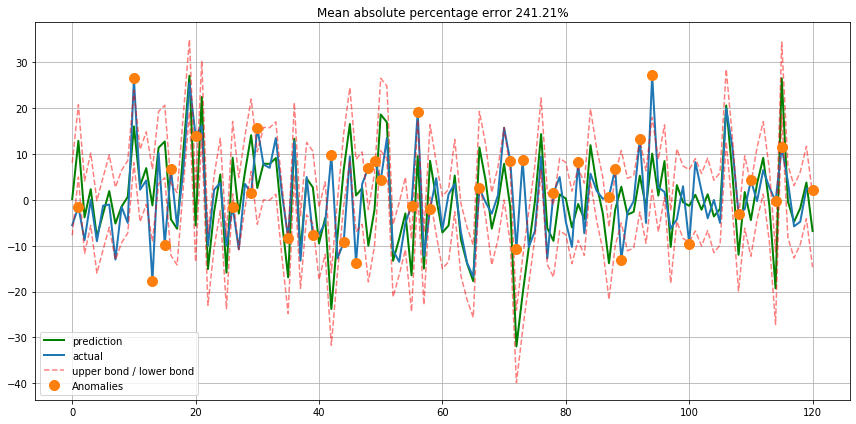

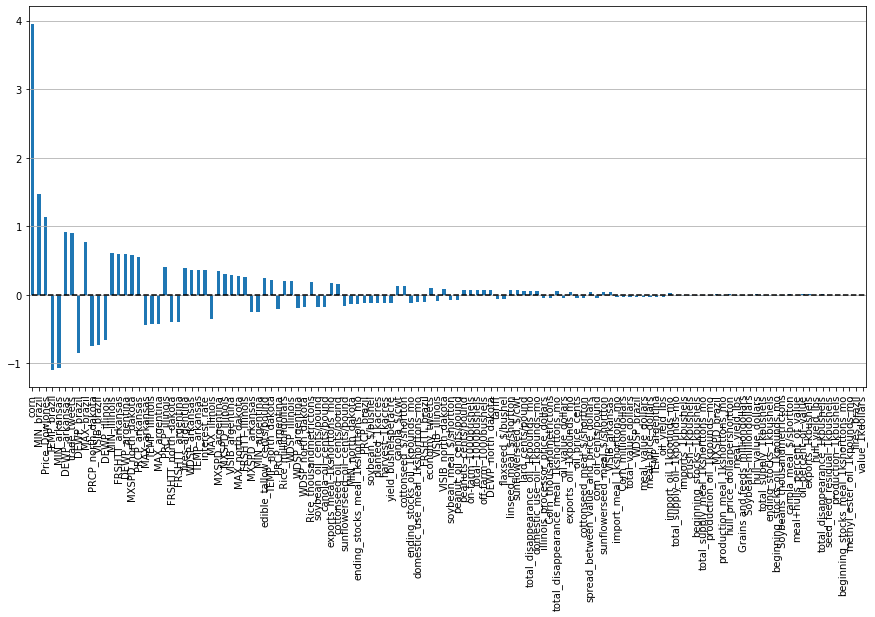

In [70]:
# ridge regression
from sklearn.linear_model import LassoCV, RidgeCV

df_ridge = df_st.copy()

y = df_ridge['soybean']
X = df_ridge.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, X_train_scaled, X_test_scaled, y_train, y_test, plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

In [71]:
# feature importance of ridge regression
feature_ridge = pd.DataFrame(ridge.coef_, X_train.columns)
feature_ridge = feature_ridge.reset_index()
feature_ridge.columns = ['variable', 'importance']
feature_ridge = feature_ridge.sort_values(by='importance', ascending=False)
feature_ridge = feature_ridge.reset_index(drop=True)
feature_ridge

variable  importance
0                                 corn    3.956059
1                           MIN_brazil    1.471352
2                       Price_DowJones    1.141135
3                        DEWP_arkansas    0.916731
4                         trade_tweets    0.896835
5                           MAX_brazil    0.766564
6                         MIN_illinois    0.611400
7                      FRSHTT_arkansas    0.595687
8                       DEWP_argentina    0.591599
9                   MXSPD_north_dakota    0.586301
10                       PRCP_arkansas    0.552580
11                       PRCP_illinois    0.404099
12                     fires_argentina    0.386418
13                       WDSP_arkansas    0.365682
14                       TEMP_arkansas    0.361398
15                       interest_rate    0.358373
16                     MXSPD_argentina    0.341695
17                      MXSPD_illinois    0.298057
18                     VISIB_argentina    0.292585
19                    MAX_north_dakota    0.266622
20                     FRSHTT_illinois    0.254575
21           edible_tallow_cents/pound    0.246579
22                   TEMP_north_dakota    0.211510
23                 Rice_milliondollars    0.204515
24                       WDSP_illinois    0.195718
25             Rice_thousandmetrictons    0.178766
26         exports_meal_1kshorttons_mo    0.168928
27          cottonseed_oil_cents/pound    0.160828
28                        canola_$/cwt    0.121632
29               cottonseed_$/shortton    0.120510
..                                 ...         ...
96                       FRSHTT_brazil   -0.103691
97    domestic_use_meal_1kshorttons_mo   -0.107572
98       ending_stocks_oil_1kpounds_mo   -0.114942
99                yield_bushelsperacre   -0.125554
100                    harvest_1kacres   -0.125554
101                    planted_1kacres   -0.125554
102                   soybean_$/bushel   -0.126575
103                        PRCP_brazil   -0.127098
104  ending_stocks_meal_1kshorttons_mo   -0.131546
105                   MIN_north_dakota   -0.136532
106      sunflowerseed_oil_cents/pound   -0.157182
107             canola_oil_cents/pound   -0.174218
108            soybean_oil_cents/pound   -0.176400
109                  WDSP_north_dakota   -0.181381
110                     WDSP_argentina   -0.191091
111                     PRCP_argentina   -0.206173
112                      MIN_argentina   -0.248503
113                     MXSPD_arkansas   -0.252497
114                       MAX_illinois   -0.356946
115                   FRSHTT_argentina   -0.394691
116                FRSHTT_north_dakota   -0.399034
117                      MAX_argentina   -0.421428
118                      TEMP_illinois   -0.425571
119                       MAX_arkansas   -0.447439
120                      DEWP_illinois   -0.656174
121                       VISIB_brazil   -0.726436
122                  PRCP_north_dakota   -0.748726
123                        DEWP_brazil   -0.852163
124                       MIN_arkansas   -1.070967
125                        TEMP_brazil   -1.090688

[126 rows x 2 columns]

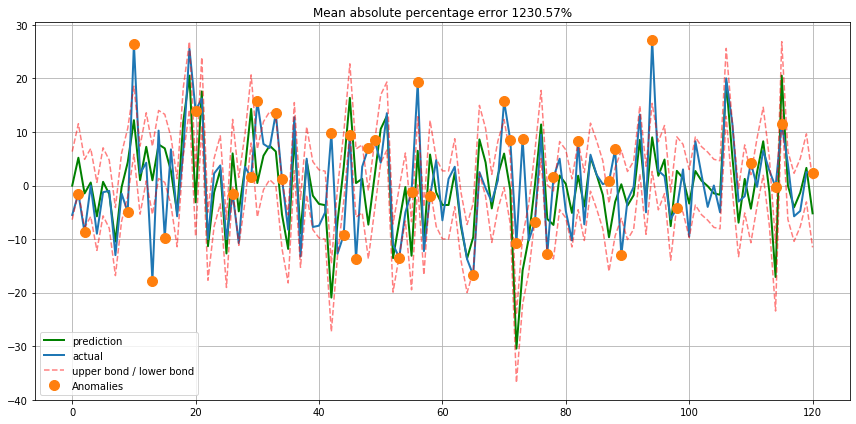

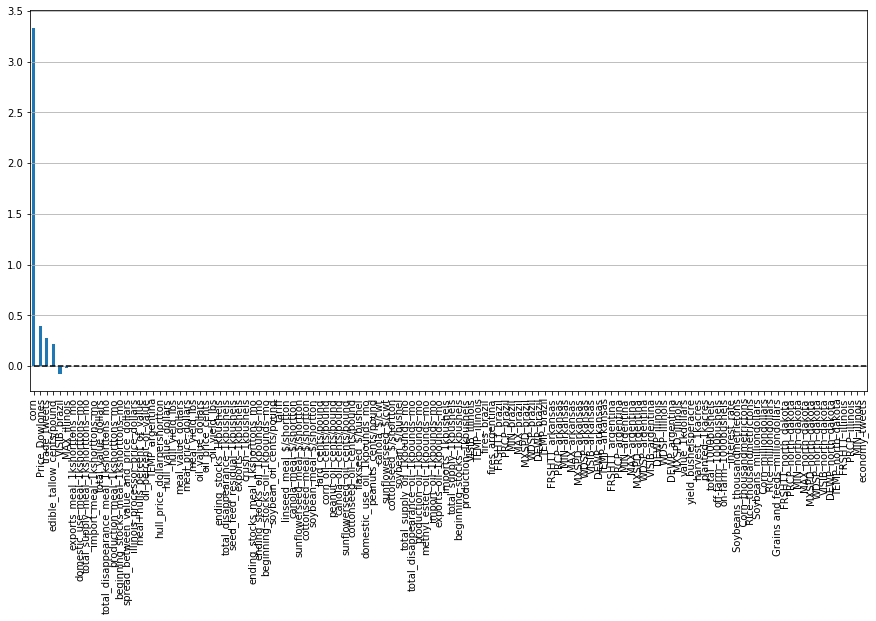

In [72]:
# Lasso regression

lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)

plotModelResults(lasso, X_train_scaled, X_test_scaled, y_train, y_test, plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

In [73]:
# feature importance of lasso regression
feature_lasso = pd.DataFrame(lasso.coef_, X_train.columns)
feature_lasso = feature_lasso.reset_index()
feature_lasso.columns = ['variable', 'importance']
feature_lasso = feature_lasso.sort_values(by='importance', ascending=False)
feature_lasso = feature_lasso.reset_index(drop=True)
feature_lasso

variable  importance
0                                      corn    3.335395
1                            Price_DowJones    0.393306
2                              trade_tweets    0.280449
3                 edible_tallow_cents/pound    0.216098
4                            TEMP_argentina   -0.000000
5      beginning_stocks_meal_1kshorttons_mo   -0.000000
6                       total_value_dollars   -0.000000
7                      oil_percent_of_value    0.000000
8               meal+hulls_percent_of_value   -0.000000
9          illinois_processor_price_dollars   -0.000000
10   spread_between_value_and_price_dollars    0.000000
11           production_meal_1kshorttons_mo    0.000000
12             hull_price_dollarpershortton    0.000000
13               import_meal_1kshorttons_mo    0.000000
14         total_supply_meal_1kshorttons_mo   -0.000000
15         domestic_use_meal_1kshorttons_mo   -0.000000
16              exports_meal_1kshorttons_mo    0.000000
17                       hull_value_dollars    0.000000
18                       meal_value_dollars   -0.000000
19                           hull_yield_lbs   -0.000000
20        ending_stocks_meal_1kshorttons_mo   -0.000000
21                       meal_price_dollars   -0.000000
22                           meal_yield_lbs   -0.000000
23                        oil_value_dollars   -0.000000
24                          oil_price_cents   -0.000000
25                            oil_yield_lbs   -0.000000
26                  ending_stocks_1kbushels   -0.000000
27            total_disappearance_1kbushels    0.000000
28             seed_feed_residual_1kbushels   -0.000000
29                        exports_1kbushels    0.000000
..                                      ...         ...
96          Grains and feeds_milliondollars   -0.000000
97                     yield_bushelsperacre   -0.000000
98                          harvest_1kacres   -0.000000
99                          planted_1kacres   -0.000000
100                       total_1000bushels    0.000000
101                    off-farm_1000bushels    0.000000
102                     on-farm_1000bushels    0.000000
103                           interest_rate    0.000000
104             Soybeans_thousandmetrictons   -0.000000
105                 Corn_thousandmetrictons   -0.000000
106                 Rice_thousandmetrictons    0.000000
107                 Soybeans_milliondollars   -0.000000
108                     Corn_milliondollars   -0.000000
109                     Rice_milliondollars    0.000000
110                     FRSHTT_north_dakota   -0.000000
111                          MXSPD_illinois    0.000000
112                       PRCP_north_dakota   -0.000000
113                        MIN_north_dakota   -0.000000
114                        MAX_north_dakota    0.000000
115                      MXSPD_north_dakota    0.000000
116                       WDSP_north_dakota   -0.000000
117                      VISIB_north_dakota    0.000000
118                       DEWP_north_dakota   -0.000000
119                       TEMP_north_dakota   -0.000000
120                         FRSHTT_illinois    0.000000
121                           PRCP_illinois    0.000000
122                            MIN_illinois   -0.000000
123                          economy_tweets    0.000000
124                            MAX_illinois   -0.018878
125                            VISIB_brazil   -0.072956

[126 rows x 2 columns]

### 3.4 XGBoost

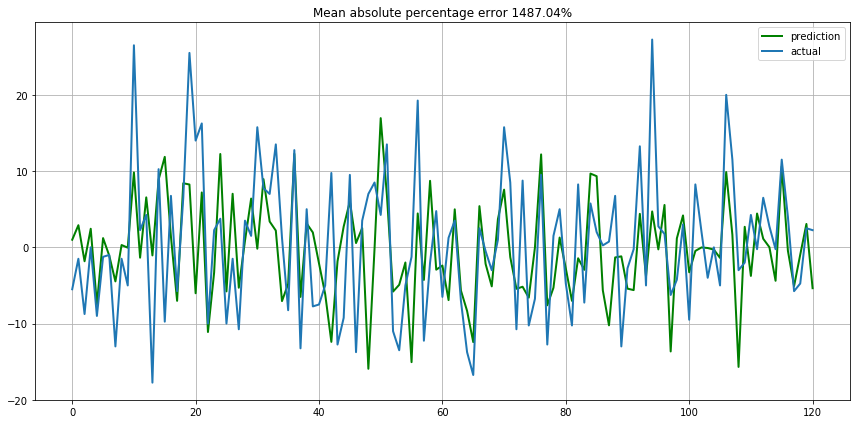

In [11]:
# xgboost model
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_st.copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)

In [75]:
# feature importance of xgboost
feature_xgb = pd.DataFrame.from_dict(xgb.get_booster().get_score(importance_type="gain"), orient='index')
feature_xgb = feature_xgb.reset_index()
feature_xgb.columns = ['variable', 'importance']
feature_xgb = feature_xgb.sort_values(by='importance', ascending=False)
feature_xgb = feature_xgb.reset_index(drop=True)
feature_xgb

variable  importance
0                        corn  540.059855
1              MXSPD_arkansas  264.356163
2              Price_DowJones  215.706272
3                      tariff  212.128418
4              economy_tweets  150.574409
5               WDSP_arkansas  109.718435
6           WDSP_north_dakota  107.570209
7           TEMP_north_dakota  102.463924
8            MIN_north_dakota   97.663776
9                trade_tweets   95.058382
10            fires_argentina   94.634819
11              TEMP_arkansas   92.092450
12               fires_brazil   91.694727
13         MXSPD_north_dakota   91.591697
14                PRCP_brazil   88.927064
15                DEWP_brazil   88.859448
16              DEWP_illinois   87.510363
17              PRCP_arkansas   85.677767
18               MAX_illinois   83.404492
19               MIN_illinois   82.347067
20              MAX_argentina   82.319375
21        FRSHTT_north_dakota   78.123155
22               MAX_arkansas   77.960288
23          DEWP_north_dakota   77.032978
24               canola_$/cwt   76.697971
25                 MIN_brazil   74.546130
26             WDSP_argentina   70.050751
27          PRCP_north_dakota   68.224612
28            FRSHTT_arkansas   67.009357
29             PRCP_argentina   65.737886
30               MXSPD_brazil   64.850407
31           FRSHTT_argentina   57.717956
32              WDSP_illinois   55.881900
33             VISIB_illinois   54.392899
34               MIN_arkansas   54.120812
35              TEMP_illinois   53.113239
36            MXSPD_argentina   50.165564
37                WDSP_brazil   49.994256
38           MAX_north_dakota   47.262879
39                 MAX_brazil   47.217267
40              PRCP_illinois   44.466415
41              MIN_argentina   42.699561
42         VISIB_north_dakota   40.366252
43              interest_rate   39.880272
44              DEWP_arkansas   38.651477
45               VISIB_brazil   38.031547
46             VISIB_arkansas   37.006071
47  edible_tallow_cents/pound   29.834553
48            FRSHTT_illinois   28.828399
49                TEMP_brazil   26.399765
50             MXSPD_illinois   19.203891
51              FRSHTT_brazil   17.948972
52             DEWP_argentina   15.037889
53             TEMP_argentina   14.902649
54            VISIB_argentina    2.598393

In [80]:
feature_ridge.to_csv('feature_ridge.csv', index=False)
feature_lasso.to_csv('feature_lasso.csv', index=False)
feature_xgb.to_csv('feature_xgboost.csv', index=False)

## SHAP and LIME

In [12]:
import lime #LIME package
import lime.lime_tabular #the type of LIIME analysis we’ll do
import shap #SHAP package
import time #some of the routines take a while so we monitor the time
import os #needed to use Environment Variables in Domino
import matplotlib.pyplot as plt #for custom graphs at the en
import seaborn as sns

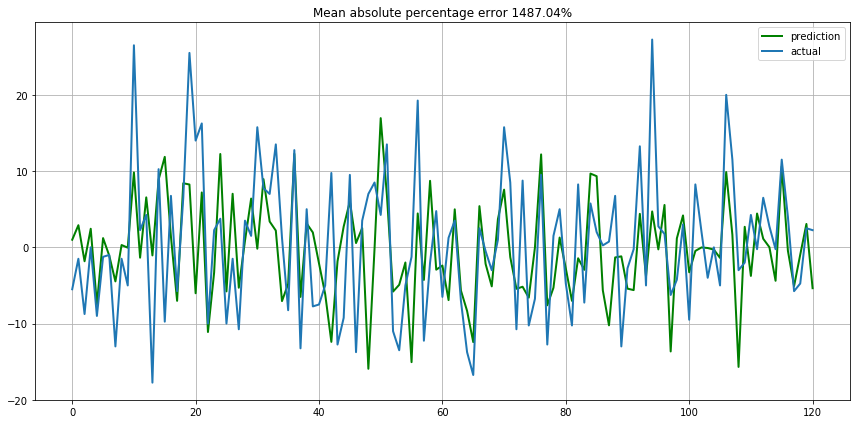

In [13]:
# xgboost model
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_st.copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)

#### SHAP

In [14]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


In [15]:
# j will be the record we explain
j = 10
# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[j], X_test_scaled.iloc[[j]])

#### Prediction week

In [16]:
## data preprocessing
data = pd.read_csv('spooky13_no_weekends.csv')
data=data.rename(columns = {'Unnamed: 0':'date'})
data = data.set_index('date')

df = data[pd.notnull(data['close_march2020_soybean'])].dropna(axis='columns', how='all')
df = df.rename(columns = {'close_march2020_soybean':'soybean', 'close_march2020_corn': 'corn', 
                         'sunflowerseed_meal_$/shortton': 'sunflowerseed', 
                         'Price_DowJones': 'DownJones', 'MAX_north_dakota': 'MAX_ND', 
                         'close_march2019_soybean': 'mar19', 
                         'close_march2018_soybean': 'mar18', 
                         'close_march2017_soybean': 'mar17',
                         'close_march2016_soybean': 'mar16',
                         'close_march2015_soybean': 'mar15'})

# fillna for tariff, trade_tweets, and economy_tweets
for col in ['tariff', 'tweets']:
    df[col] = df[col].fillna(0)

# remove missing columns
rm_list = df.columns[df.isnull().any()]
df = df.drop(columns = rm_list)

# get rid of the last five rows
df = df.drop(df.index[-5:])


## get the shifted datasets
# df_base is the base dataframe
df_lag = [None]*5
append_list = ['2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08']
df_base = df.copy()
for i in range(5):
    df_lag[i] = df_base.copy().append(pd.DataFrame(index=append_list[:(i+1)]))
    for col in df_lag[i].columns:
        df_lag[i][col] = df_lag[i][col].shift(i+1)
    df_lag[i]['soybean'] = df_base['soybean']
    df_lag[i] = df_lag[i].drop(df_lag[i].index[:(i+1)])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import TimeSeriesSplit 
from xgboost import XGBRegressor 
from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
tscv = TimeSeriesSplit(n_splits=5)

xgb = XGBRegressor(verbosity=0)

In [18]:
# xgboost model
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_lag[0].copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

# plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)

In [19]:
# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


In [20]:
# j will be the record we explain

# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[-1], X_test_scaled.iloc[[-1]])

In [21]:
# xgboost model lag 2
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_lag[1].copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

# plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)


# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


# j will be the record we explain

# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[-1], X_test_scaled.iloc[[-1]])

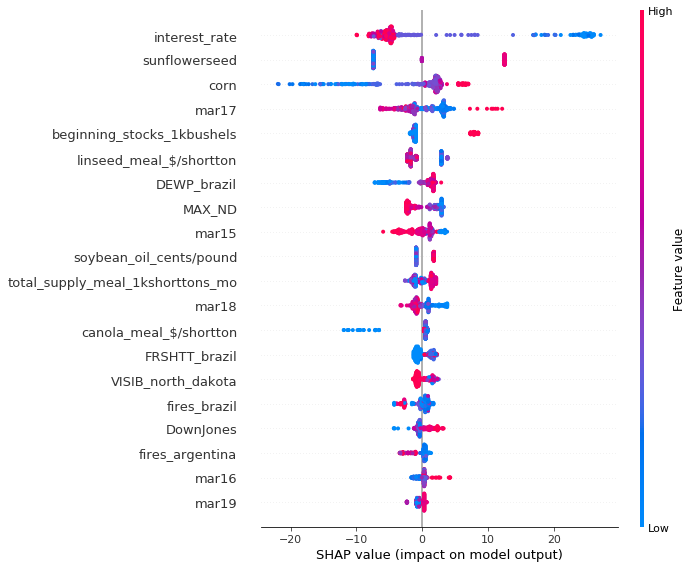

In [27]:
shap.initjs()

shap.summary_plot(shap_values_XGB_train, X_train_scaled)

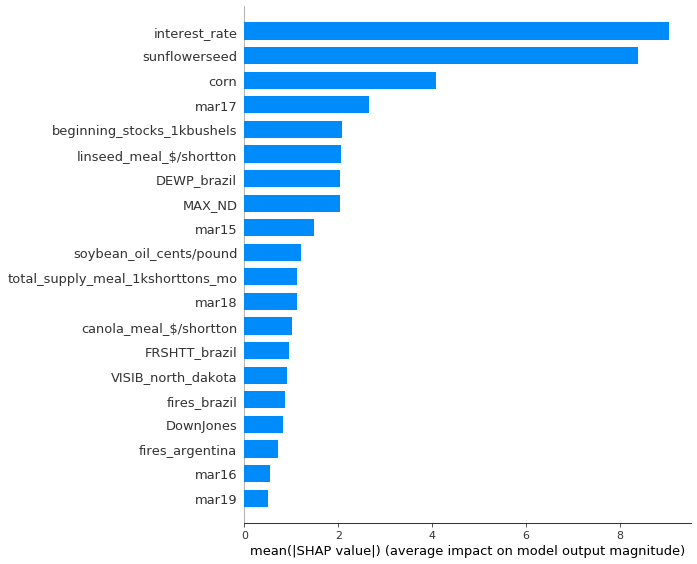

In [28]:
shap.summary_plot(shap_values_XGB_train, X_train_scaled, plot_type='bar')

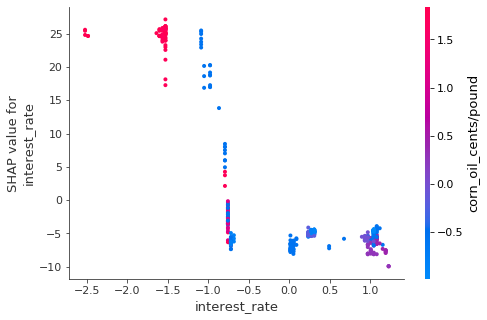

In [67]:
shap.dependence_plot('interest_rate', shap_values_XGB_train, X_train_scaled)

In [22]:
# xgboost model lag 3
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_lag[2].copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

# plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)


# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


# j will be the record we explain

# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[-1], X_test_scaled.iloc[[-1]])

In [23]:
# xgboost model lag 4
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_lag[3].copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

# plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)


# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


# j will be the record we explain

# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[-1], X_test_scaled.iloc[[-1]])

In [24]:
# xgboost model lag 5
from xgboost import XGBRegressor 
from xgboost import plot_importance

df_xgb = df_lag[4].copy()

y = df_xgb['soybean']
X = df_xgb.drop(['soybean'], axis=1)

X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.01)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
# X_test_scaled = pd.DataFrame(scaler.transform(X_test))

xgb = XGBRegressor(verbosity=0)
xgb.fit(X_train_scaled, y_train);
xgb_pred = xgb.predict(X_test_scaled)

# plotModelResults(xgb, X_train_scaled, X_test_scaled, y_train, y_test, plot_anomalies=True)


# Tree on XGBoost
explainerXGB = shap.TreeExplainer(xgb)
shap_values_XGB_test = explainerXGB.shap_values(X_test_scaled)
shap_values_XGB_train = explainerXGB.shap_values(X_train_scaled)
df_shap_XGB_test = pd.DataFrame(shap_values_XGB_test, columns=X_test_scaled.columns.values)
df_shap_XGB_train = pd.DataFrame(shap_values_XGB_train, columns=X_train_scaled.columns.values)


# j will be the record we explain

# initialize js for SHAP
shap.initjs()

shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[-1], X_test_scaled.iloc[[-1]])

In [114]:
# feature importance of xgboost
feature_xgb = pd.DataFrame.from_dict(xgb.get_booster().get_score(importance_type="gain"), orient='index')
feature_xgb = feature_xgb.reset_index()
feature_xgb.columns = ['variable', 'importance']
feature_xgb = feature_xgb.sort_values(by='importance', ascending=False)
feature_xgb = feature_xgb.reset_index(drop=True)
feature_xgb

variable    importance
0                soybean_oil_cents/pound  22482.000000
1                          sunflowerseed  19897.600000
2             beginning_stocks_1kbushels  14274.437500
3                linseed_meal_$/shortton  11728.083333
4                          interest_rate   8391.916928
5                 canola_meal_$/shortton   5688.900000
6                                   corn   4883.963705
7       total_supply_meal_1kshorttons_mo   3899.781677
8           total_supply_oil_1kpounds_mo   2390.171880
9          ending_stocks_oil_1kpounds_mo   2103.343750
10                          fires_brazil   2077.465887
11      beginning_stocks_oil_1kpounds_mo   1599.000000
12                                MAX_ND   1552.177782
13                                 mar17   1353.946848
14                     flaxseed_$/bushel   1280.843750
15                           DEWP_brazil   1228.093019
16               exports_oil_1kpounds_mo   1166.695206
17                                 mar15    977.818877
18                            MIN_brazil    954.204849
19                    VISIB_north_dakota    937.631170
20                       fires_argentina    936.626002
21                                 mar19    934.777667
22                      MIN_north_dakota    866.718750
23                         FRSHTT_brazil    806.822189
24                peanut_oil_cents/pound    761.243165
25                                 mar16    731.360756
26            cottonseed_meal_$/shortton    670.906128
27                     TEMP_north_dakota    660.433753
28                                 mar18    601.194134
29  beginning_stocks_meal_1kshorttons_mo    584.514150
..                                   ...           ...
39                         WDSP_illinois    403.889007
40                      TEMP_mississippi    387.337528
41                          VISIB_brazil    362.264099
42                       FRSHTT_illinois    356.961847
43                       MAX_mississippi    334.429711
44                           TEMP_brazil    329.493179
45                           WDSP_brazil    323.018234
46            import_meal_1kshorttons_mo    320.826111
47                         MIN_argentina    307.187012
48         sunflowerseed_oil_cents/pound    294.334465
49                       MXSPD_argentina    294.273419
50                        PRCP_argentina    293.331192
51                       VISIB_argentina    285.436966
52                         MAX_argentina    274.508774
53                     MXSPD_mississippi    274.199814
54                   FRSHTT_north_dakota    271.985108
55                         PRCP_illinois    267.454239
56                        WDSP_argentina    246.388509
57                          MXSPD_brazil    230.670886
58                                tweets    230.150326
59                            MAX_brazil    193.569743
60                       MIN_mississippi    192.035663
61                     PRCP_north_dakota    191.991039
62                          MIN_illinois    149.374969
63                     VISIB_mississippi    137.590842
64                    MXSPD_north_dakota    132.826361
65                        DEWP_argentina     56.864128
66                      WDSP_mississippi     44.810150
67                          MAX_illinois     44.726425
68                      FRSHTT_argentina     38.429176

[69 rows x 2 columns]